<a href="https://colab.research.google.com/github/07subhadip/CNN-Projects/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import os
import platform
import time
import datetime
import random
import math

In [2]:
print(f"Python Version : {platform.python_version()}")
print(f"TensorFlow Version : {tf.__version__}")
print(f'Keras Version : {tf.keras.__version__}')

Python Version : 3.12.12
TensorFlow Version : 2.19.0
Keras Version : 3.10.0


In [3]:
!nvidia-smi

Tue Dec  2 06:49:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test : (10000,)


In [6]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train.shape
IMAGE_CHANNELS = 1

print(f"Image width: {IMAGE_WIDTH}")
print(f"Image height: {IMAGE_HEIGHT}")
print(f"Image channels: {IMAGE_CHANNELS}")

Image width: 28
Image height: 28
Image channels: 1


In [7]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [8]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.DataFrame(X_test[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0


In [10]:
plt.style.use("dark_background")

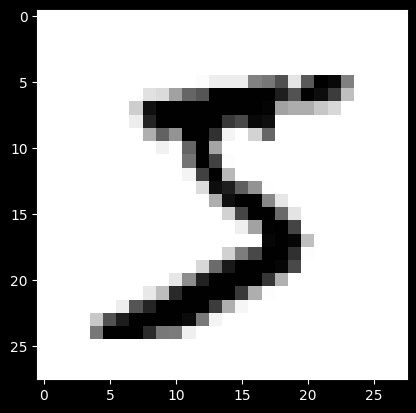

In [11]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

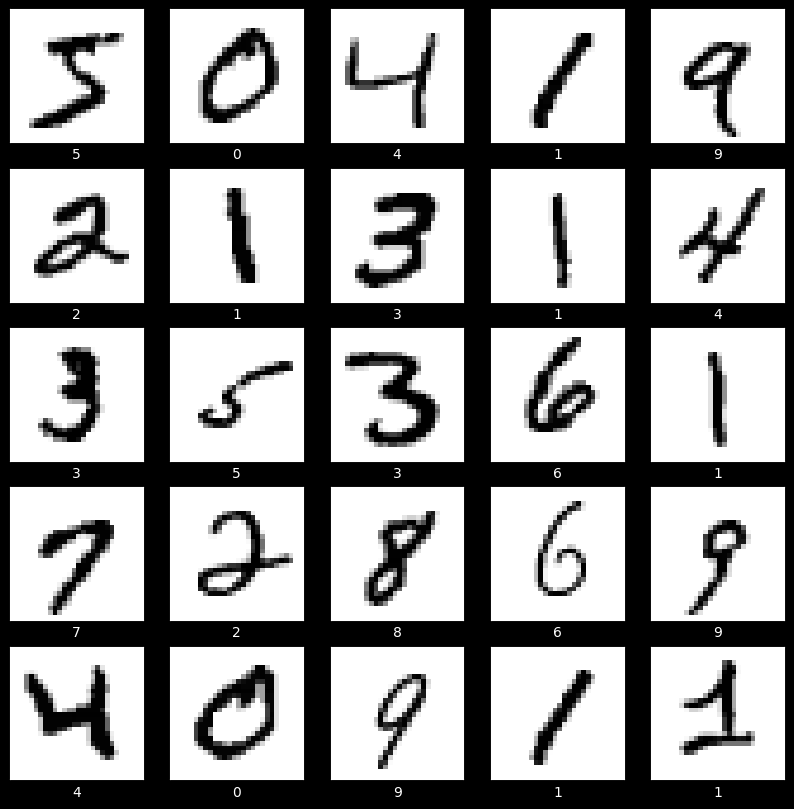

In [12]:
numbers_to_display = 25

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (10,10))

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

In [13]:
X_train_with_channels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_test_with_channels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [14]:
print(f"X_train_with_channels : {X_train_with_channels.shape}")
print(f"X_Test_with_channels : {X_test_with_channels.shape}")

X_train_with_channels : (60000, 28, 28, 1)
X_Test_with_channels : (10000, 28, 28, 1)


In [15]:
X_train_normalized = X_train_with_channels / 255.
X_test_normalized = X_test_with_channels / 255.

In [16]:
X_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [17]:
model = tf.keras.models.Sequential(
    [
        Conv2D(
            input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
            kernel_size = 5,
            filters = 8,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Conv2D(
            kernel_size = 5,
            filters = 16,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Flatten(),

        Dense(
            units = 128,
            activation = tf.keras.activations.relu
        ),

        Dropout(0.2),

        Dense(
            units = 10,
            activation = tf.keras.activations.softmax,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        )
    ]
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

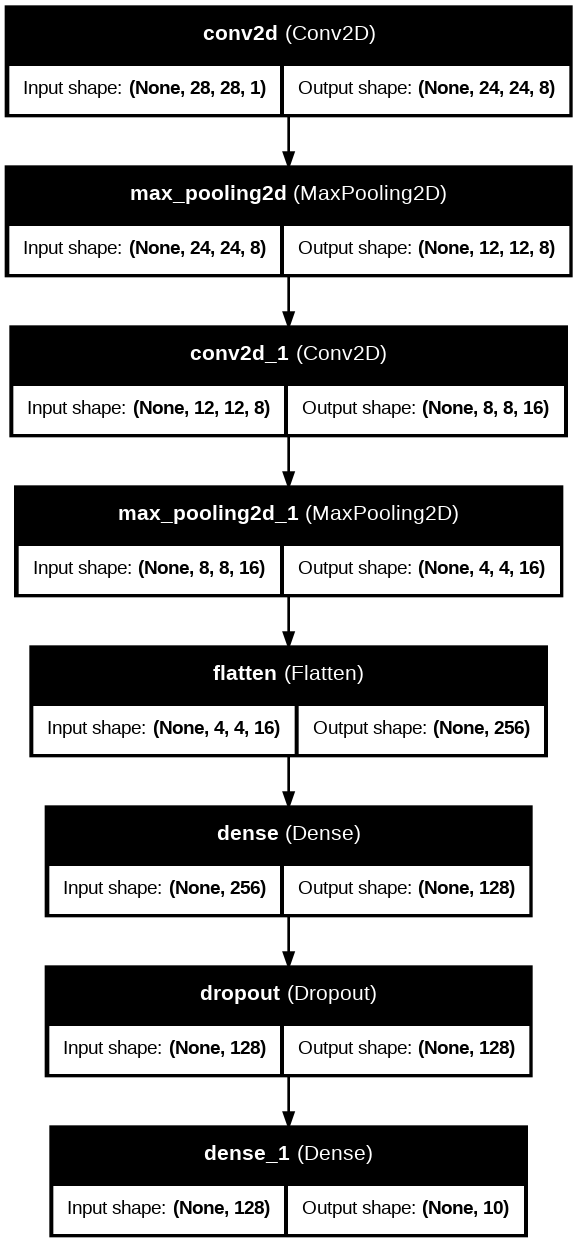

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file = "model_architecture.png",
    show_shapes = True,
    show_layer_names = True,
    dpi = 96,
    rankdir = "TB"
)

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [21]:
training_history = model.fit(
    X_train_normalized,
    y_train,
    epochs = 10,
    validation_data = (X_test_normalized, y_test),
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8637 - loss: 0.4302 - val_accuracy: 0.9787 - val_loss: 0.0619
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0723 - val_accuracy: 0.9852 - val_loss: 0.0451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0530 - val_accuracy: 0.9883 - val_loss: 0.0376
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0323 - val_accuracy: 0.9898 - val_loss: 0.0294
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9915 - val_loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9907 - val_loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0230 -

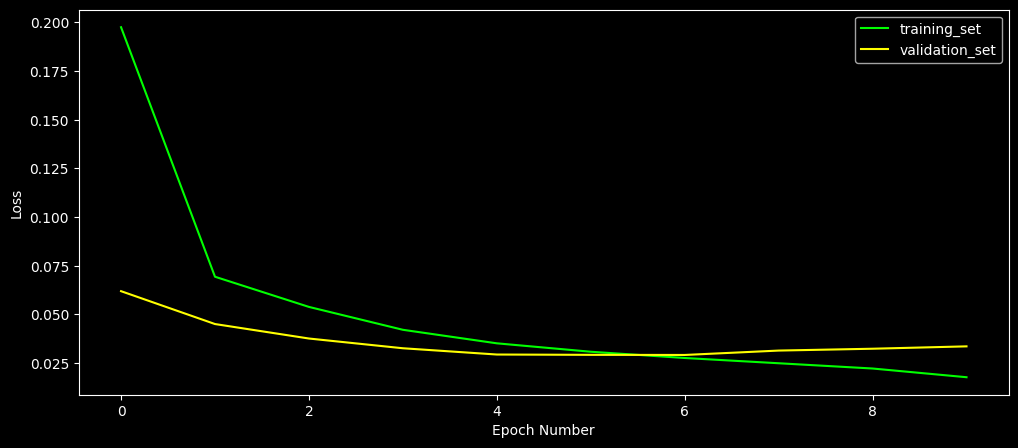

In [22]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_loss'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

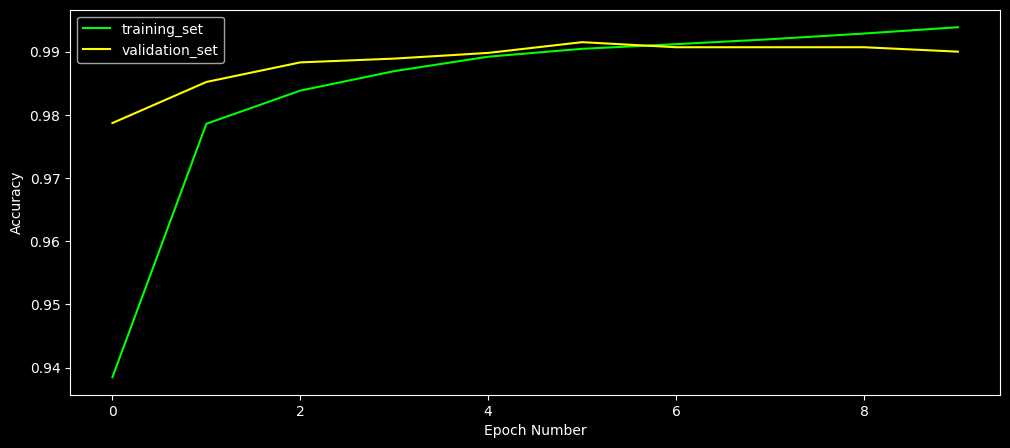

In [23]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_accuracy'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

In [24]:
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)

print(f"Training Loss : {train_loss}")
print(f"Training Accuracy : {train_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9967 - loss: 0.0104
Training Loss : 0.010444565676152706
Training Accuracy : 0.9966833591461182


In [25]:
validation_loss, validation_accuracy = model.evaluate(X_test_normalized, y_test)

print(f"Training Loss : {validation_loss}")
print(f"Training Accuracy : {validation_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0414
Training Loss : 0.033583708107471466
Training Accuracy : 0.9900000095367432


In [26]:
model_name = "Subhadip_Hensh_MNIST_CNN.keras"
model.save("Subhadip_Hensh_MNIST_CNN.keras")

In [27]:
loaded_model = tf.keras.models.load_model("Subhadip_Hensh_MNIST_CNN.keras")

In [28]:
predictions_one_hot = loaded_model.predict([X_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
print(f"predictions_one_hot : {predictions_one_hot.shape}")

predictions_one_hot : (10000, 10)


In [30]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.732362e-11,3.542506e-08,9.474928e-07,1.455114e-06,4.325444e-08,2.497994e-12,1.232104e-14,9.999974e-01,8.982262e-09,9.448647e-08
1,6.215606e-10,1.842034e-11,1.000000e+00,1.586413e-15,1.271591e-15,7.936728e-18,2.647516e-10,5.638384e-18,8.659932e-11,2.116110e-17
2,5.482423e-08,9.999998e-01,4.299829e-09,1.750170e-12,4.375214e-08,8.453149e-10,6.833179e-09,7.924574e-08,8.564407e-08,6.380678e-09
3,9.999995e-01,3.575973e-13,1.255138e-10,2.043418e-11,5.505054e-12,6.089526e-10,3.205956e-07,6.487953e-11,3.228013e-08,8.713125e-08
4,2.949729e-17,4.900896e-11,7.876651e-16,2.185230e-18,9.999995e-01,3.056770e-15,2.131261e-14,1.263881e-16,3.469829e-12,4.401859e-07
...,...,...,...,...,...,...,...,...,...,...
9995,8.538373e-13,5.095521e-09,1.000000e+00,3.018083e-11,4.600305e-16,1.002695e-18,1.315367e-17,6.730063e-10,1.438370e-10,1.970123e-17
9996,2.220447e-19,2.238098e-14,4.389194e-14,1.000000e+00,2.631549e-20,1.962241e-08,1.327853e-19,4.368998e-14,1.462385e-13,5.070577e-12
9997,5.705693e-19,1.208932e-12,2.632871e-15,2.902758e-17,1.000000e+00,2.960679e-15,3.887337e-13,2.769585e-12,7.586531e-12,2.849205e-13
9998,6.179861e-15,4.991414e-14,8.945040e-17,6.116343e-10,4.663386e-13,9.999038e-01,3.789395e-10,1.592608e-15,9.621190e-05,1.292276e-09


In [31]:
predictions_one_hot.sum(axis = 1)[0]

np.float32(1.0)

In [32]:
for i in range(10):
    print(f"{i} row sum is : {predictions_one_hot.sum(axis = 1)[0]}")

0 row sum is : 1.0
1 row sum is : 1.0
2 row sum is : 1.0
3 row sum is : 1.0
4 row sum is : 1.0
5 row sum is : 1.0
6 row sum is : 1.0
7 row sum is : 1.0
8 row sum is : 1.0
9 row sum is : 1.0


In [33]:
predictions = np.argmax(predictions_one_hot, axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [34]:
for i in range(10):
    print(predictions[i], end = ",")

7,2,1,0,4,1,4,9,5,9,

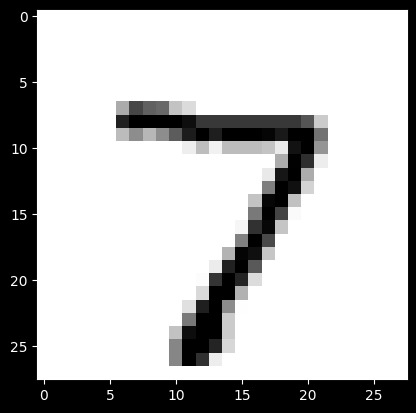

In [35]:
plt.imshow(X_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = plt.cm.binary)

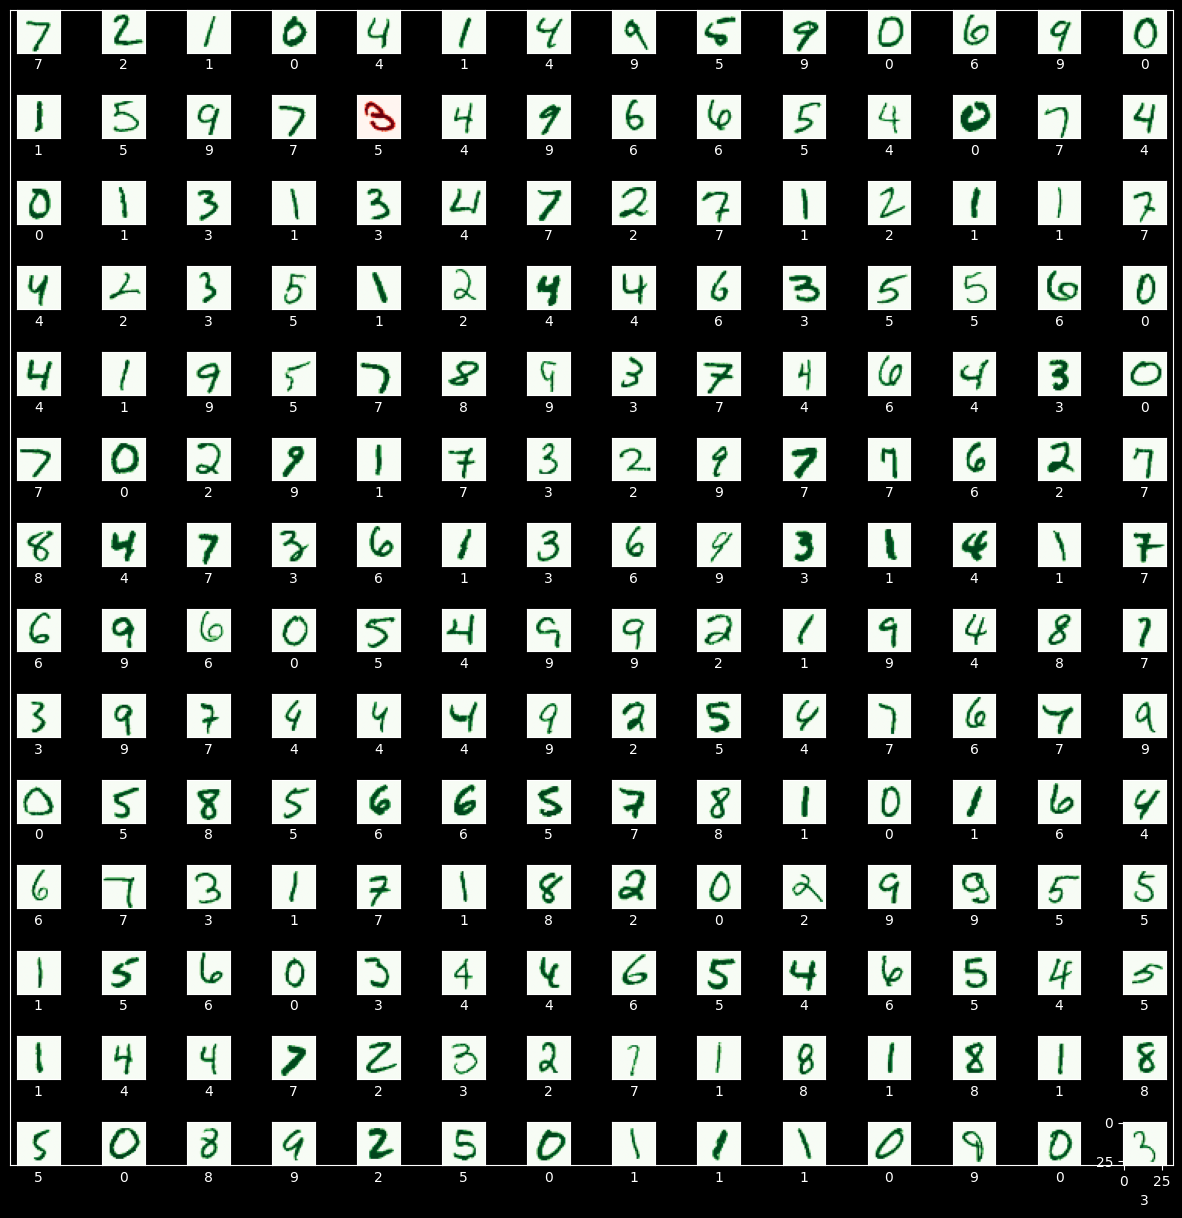

In [36]:
numbers_to_display = 196

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = "Greens" if predicted_label == y_test[plot_index] else "Reds"
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.show()

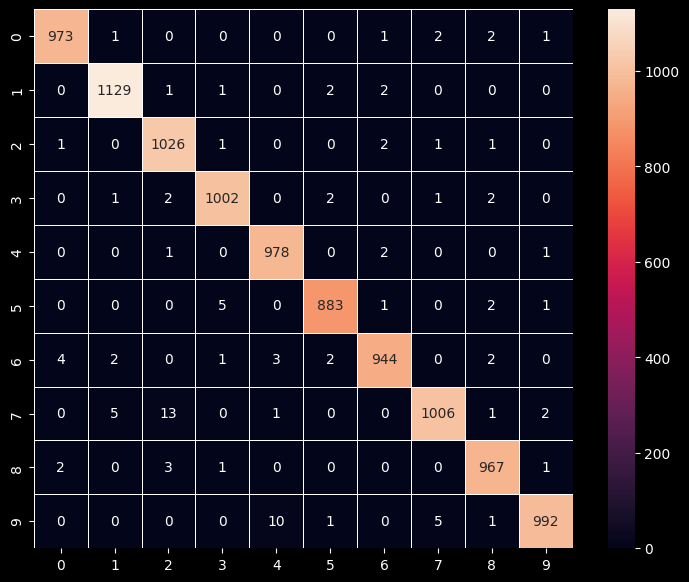

In [37]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize = (9, 7))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = 0.5,
    fmt = "d",
    square = True,
    ax = ax
)

plt.show()

In [38]:
import cv2


--- Contoured Image ---


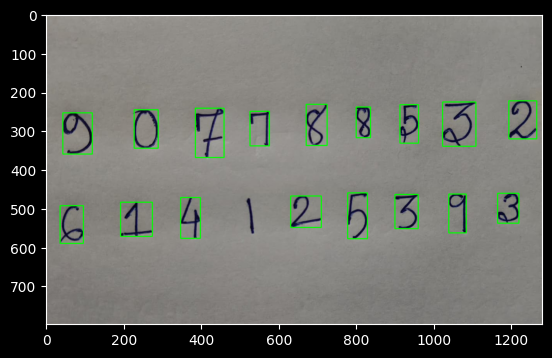


------------------- Making Predictions ----------------------


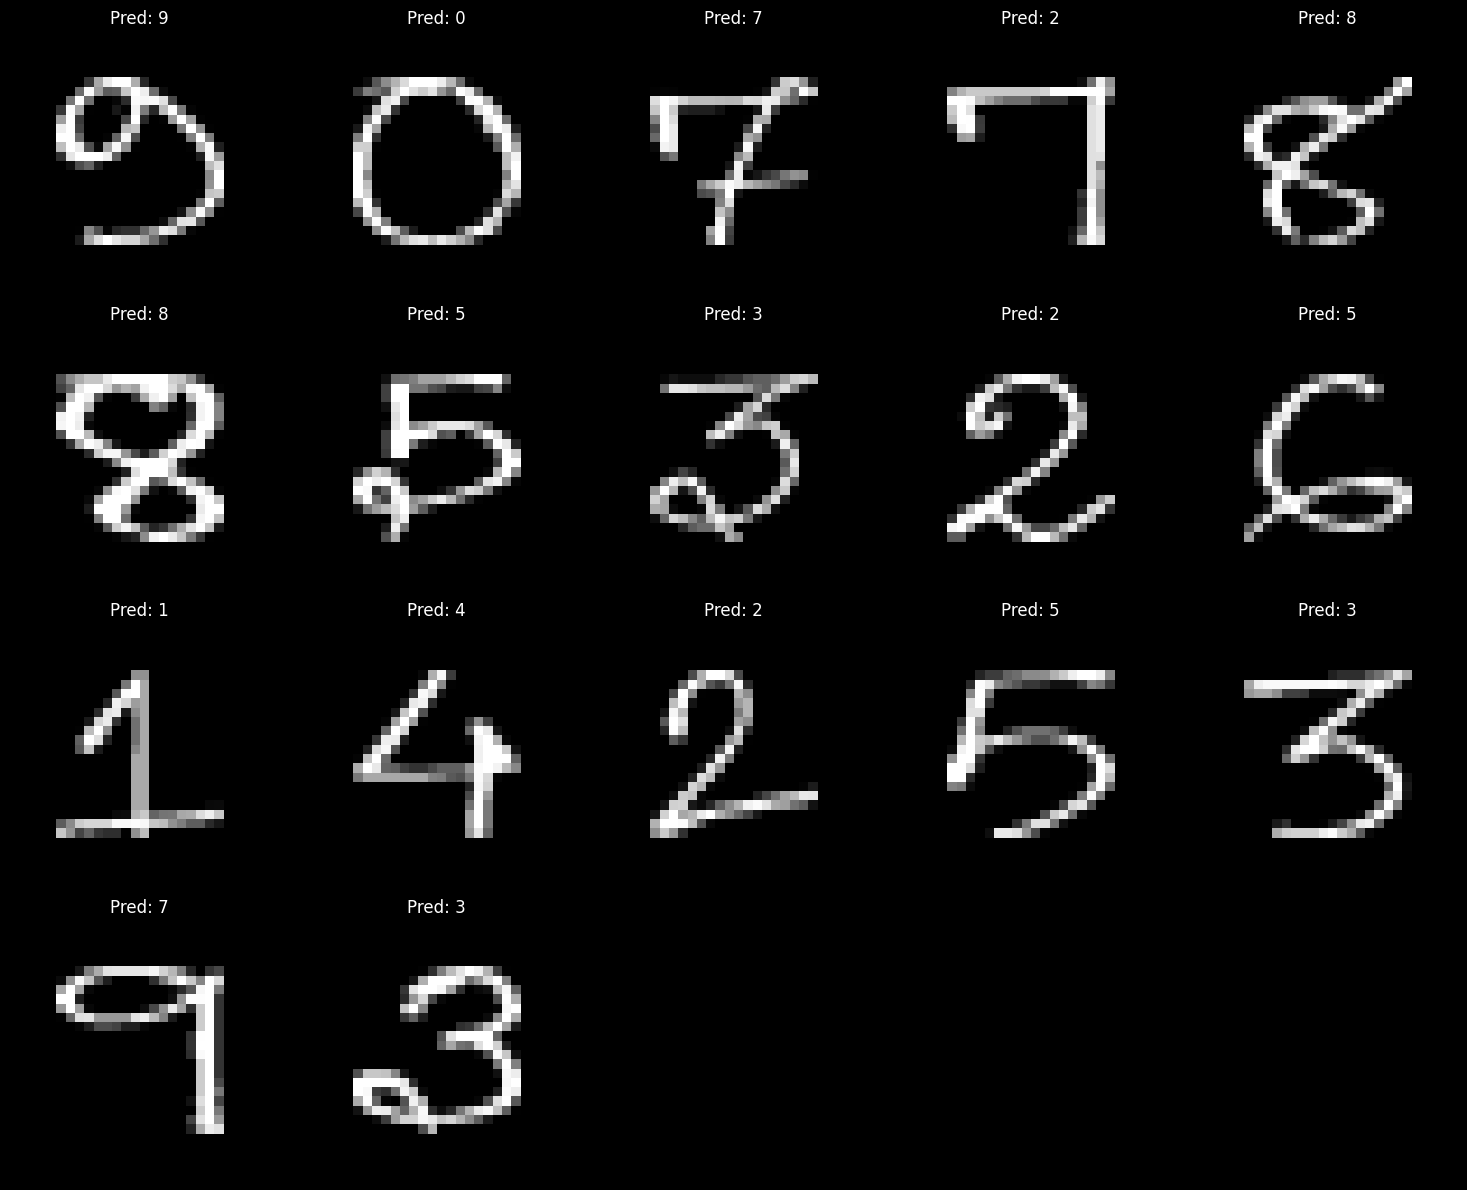

In [39]:
try:
    image = cv2.imread("/content/MNIST_input.jpg")
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
except Exception as e:
    print("Error loading image :", e)

if image is None:
    print("FATAL ERROR: Image NOT loaded.")
else:
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(grey, 75, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contoured_image = image.copy()
    digit_boxes = []

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)

        if w < 20 or h < 20:
            continue

        cv2.rectangle(contoured_image, (x, y), (x+w, y+h), (0,255,0), 2)

        digit = thresh[y:y+h, x:x+w]
        resized_digit = cv2.resize(digit, (18, 18), interpolation=cv2.INTER_AREA)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        normalized_digit = padded_digit / 255.0

        digit_boxes.append((x, y, normalized_digit))

    print("\n--- Contoured Image ---")
    plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print("\n------------------- Making Predictions ----------------------")

    digit_boxes = sorted(digit_boxes, key=lambda b: (b[1]//100, b[0]))

    preprocessed_digits = [d[2] for d in digit_boxes]
    num_digits = len(preprocessed_digits)

    cols = 5
    rows = math.ceil(num_digits / cols)

    plt.figure(figsize=(15, rows * 3))

    for i, digit in enumerate(preprocessed_digits):
        input_tensor = digit.reshape(1, 28, 28, 1)
        prediction = loaded_model.predict(input_tensor, verbose=0)
        final_output = np.argmax(prediction)

        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(digit.reshape(28, 28), cmap='gray')
        ax.set_title(f"Pred: {final_output}", fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
